<a href="https://colab.research.google.com/github/Shk-aftab/AI/blob/master/cats%26dogCNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 450kB 36.9MB/s 
     |████████████████████████████████| 3.8MB 43.9MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [0]:
test_dir="/content/drive/My Drive/datasets/cats&dogs_classification/CNN classification/dataset/test_set"
train_dir="/content/drive/My Drive/datasets/cats&dogs_classification/CNN classification/dataset/training_set"


train_dir_cats = train_dir + '/cats'
train_dir_dogs = train_dir + '/dogs'
test_dir_cats = test_dir + '/cats'
test_dir_dogs = test_dir + '/dogs'

In [0]:
print('number of cats training images - ',len(os.listdir(train_dir_cats)))
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))

number of cats training images -  4000
number of dogs training images -  4002
number of cats testing images -  1000
number of dogs testing images -  1000


In [0]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
         directory='drive/My Drive/datasets/cats&dogs_classification/CNN classification/dataset/training_set',
        target_size=(150, 150),
        batch_size=64,
        shuffle=True,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
         directory='drive/My Drive/datasets/cats&dogs_classification/CNN classification/dataset/test_set',
        target_size=(150, 150),
        batch_size=64,
        shuffle=True,
        class_mode='binary') 

Found 8002 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,3,input_shape=(150,150,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        

        tf.keras.layers.Conv2D(32,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        

        tf.keras.layers.Conv2D(64,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(rate=0.5),


        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.5),

        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(rate=0.5),

        tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 17, 17, 64)       

In [39]:
Trained_model=model.fit_generator(training_set,
                        steps_per_epoch = 125,
                        epochs =30 ,
                        validation_data = test_set,
                        validation_steps =30 )

model.save("modelcats&dogs.h5")

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 30 steps
Epoch 1/30
125/125 [==============================] - 1065s 9s/step - loss: 0.6817 - accuracy: 0.5692 - val_loss: 0.8221 - val_accuracy: 0.5224
Epoch 2/30
125/125 [==============================] - 293s 2s/step - loss: 0.6608 - accuracy: 0.6211 - val_loss: 0.6570 - val_accuracy: 0.6229
Epoch 3/30
125/125 [==============================] - 290s 2s/step - loss: 0.6267 - accuracy: 0.6563 - val_loss: 0.6335 - val_accuracy: 0.6411
Epoch 4/30
125/125 [==============================] - 289s 2s/step - loss: 0.5897 - accuracy: 0.6897 - val_loss: 0.5408 - val_accuracy: 0.7391
Epoch 5/30
125/125 [==============================] - 290s 2s/step - loss: 0.5553 - accuracy: 0.7181 - val_loss: 0.5565 - val_accuracy: 0.7115
Epoch 6/30
125/125 [==============================] - 290s 2s/step - loss: 0.5303 - accuracy: 0.7353 - val_loss: 0.4868 - val_accuracy: 0.7807
Epoch 7/30
125/125 [============================

In [44]:
Trained_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

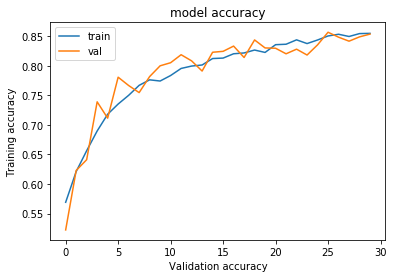

In [46]:
plt.plot(Trained_model.history['accuracy'])
plt.plot(Trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Training accuracy')
plt.xlabel('Validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

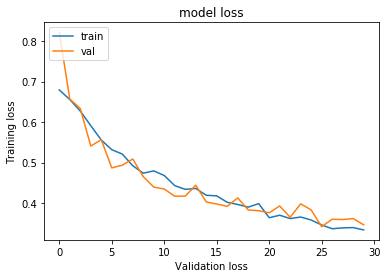

In [47]:
plt.plot(Trained_model.history['loss'])
plt.plot(Trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('Training loss')
plt.xlabel('Validation loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (150, 150))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  == 1:
        prediction = 'Dog'
    else:
        prediction = 'Cat'
    return prediction

In [51]:
print(testing_image(test_dir + '/cats/cat.4011.jpg'))

[[0.]]
Cat


In [0]:
print(testing_image(test_dir + '/dogs/dog.4078.jpg'))

[[1.]]
Dog
